In [7]:
import pandas as pd

def cleave(row):
    seq = row.Collapsed_barcodes
    return seq[0:16], seq[16:32], seq[32:48], seq[48:68]

# Loading umi-tools output
dir = "/users/biocomp/bahin/Downloads/DemultiplexInfluenza_A2020/200316_M05218_0191_000000000-D7R5H__B3544/Umi-tools/"
df = pd.read_csv(dir + "res.tsv", sep="\t", header=None, names=["Collapsed_barcodes", "Synonyms", "Count", "Synonyms_count"])
display(df.head(2))

# Cleaving the barcodes
df[["indexB", "indexC", "indexD", "indexE"]] = df.apply(lambda row: cleave(row), axis=1, result_type="expand")
display(df.head(2))



,Collapsed_barcodes,Synonyms,Count,Synonyms_count
0,AAAACCAACACCCAGGAAAGCCCGGGACTGTTGAGAGCCAAATCCC...,AAAACCAACACCCAGGAAAGCCCGCGACTGTTGAGAGCCAAATCCC...,8,"1,1"
1,AAAACCAACACCCAGGACAGGGACGAGTGTAAAATGATGAGAACTG...,NaN,8,NaN


,Collapsed_barcodes,Synonyms,Count,Synonyms_count,indexB,indexC,indexD,indexE
0,AAAACCAACACCCAGGAAAGCCCGGGACTGTTGAGAGCCAAATCCC...,AAAACCAACACCCAGGAAAGCCCGCGACTGTTGAGAGCCAAATCCC...,8,"1,1",AAAACCAACACCCAGG,AAAGCCCGGGACTGTT,GAGAGCCAAATCCCTA,ATGAGTCTAGTACGAGAACT
1,AAAACCAACACCCAGGACAGGGACGAGTGTAAAATGATGAGAACTG...,NaN,8,NaN,AAAACCAACACCCAGG,ACAGGGACGAGTGTAA,AATGATGAGAACTGGC,ATGAGTCTAGTACGAGAACT


In [18]:
# Check E index concordancy with strain
import pandas as pd

dir = "/users/biocomp/bahin/Downloads/DemultiplexInfluenza_A2020/200316_M05218_0191_000000000-D7R5H__B3544/Umi-tools/"
filename = "i08.tsv"
df = pd.read_csv(filename, sep="\t", index_col=0)
df.loc[:, "E_index"] = df.Barcode.str[-2:]
display(df.groupby(["Strain", "E_index"])["UMI"].count())

Strain     E_index
H1N1       E1         20492
           E2           980
H3N2       E1          4331
           E2         62740
Undefined  E1          2721
           E2          1310
Name: UMI, dtype: int64

In [126]:
## FacetGrid lab
# Loading data
dir = "/users/biocomp/bahin/Downloads/DemultiplexInfluenza_A2020/200316_M05218_0191_000000000-D7R5H__B3544/Umi-tools/"
filename1 = "i06.tsv"
df1 = pd.read_csv(filename1, sep="\t", index_col=0, na_filter = False)
df1.loc[:, "Sample"] = "i06"
display(df1.shape)
display(df1.head(2))
filename2 = "i08.tsv"
df2 = pd.read_csv(filename2, sep="\t", index_col=0, na_filter = False)
df2.loc[:, "Sample"] = "i08"
display(df2.shape)
display(df2.head(2))

# Merging datasets
df = pd.concat([df1, df2])
display(df.shape)
display(df.tail(2))

(212484, 9)

,UMI,Strain_R1,RNA_fragment_R1,Strain_R2,RNA_fragment_R2,Strain,RNA_fragment,Barcode,Sample
M05218:191:000000000-D7R5H:1:1102:17005:26617,CGGGGCCTG,H1N1,M,H1N1,M,H1N1,M,B1-C1-D37-E1,i06
M05218:191:000000000-D7R5H:1:1102:5189:14953,CGCCCTGTT,H1N1,PA,H1N1,PA,H1N1,PA,B1-C1-D4-E1,i06


(162786, 9)

,UMI,Strain_R1,RNA_fragment_R1,Strain_R2,RNA_fragment_R2,Strain,RNA_fragment,Barcode,Sample
M05218:191:000000000-D7R5H:1:1102:12919:12938,CGAAGGGGC,H3N2,NS,H3N2,NS,H3N2,NS,B1-C1-D25-E2,i08
M05218:191:000000000-D7R5H:1:1102:13620:28263,TAGAGATCG,H1N1,NS,H3N2,NP,Undefined,Undefined,B1-C1-D41-E1,i08


(375270, 9)

,UMI,Strain_R1,RNA_fragment_R1,Strain_R2,RNA_fragment_R2,Strain,RNA_fragment,Barcode,Sample
M05218:191:000000000-D7R5H:1:1102:8695:26512,TTTTTTTCT,H3N2,NS,H3N2,NS,H3N2,NS,,i08
M05218:191:000000000-D7R5H:1:1102:6915:17857,TTTTTTTTG,H3N2,M,H3N2,M,H3N2,M,,i08


,Total_reads_raw,Total_unique_reads_raw,Total_reads_BC_filter,Total_unique_reads_BC_filter
Barcode,,,,
B1-C1-D37-E1,1,1,NaN,NaN
B1-C1-D4-E1,3,3,NaN,NaN
B1-C1-D80-E2,1,1,NaN,NaN
B1-C10-D37-E2,1,1,NaN,NaN
B1-C10-D51-E1,6,4,6.0,4.0


NameError: name 'sys' is not defined

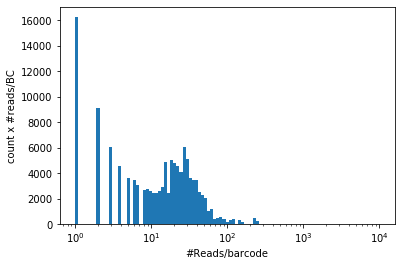

In [15]:
## FacetGrid lab (barplot)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data
filename1 = "i06.droplet_total_reads.tsv"
df1 = pd.read_csv(filename1, sep="\t", index_col=0)
display(df1.head())

barplot = df1.reset_index()
barplot = barplot.groupby("Total_unique_reads_raw", as_index=False).count()
barplot["Weights"] = barplot["Barcode"] * barplot["Total_unique_reads_raw"]
plt.hist(barplot["Total_unique_reads_raw"], np.logspace(0, 4, 100), weights=barplot["Weights"])
plt.xscale("log")
plt.xlabel("#Reads/barcode")
plt.ylabel("count x #reads/BC")
sys.exit()
#df1.loc[:, "Sample"] = "i06"
df1 = df1.loc[df1.Barcode != "", :].copy()
display(df1.shape)
display(df1.head(2))

filename2 = "i08.tsv"
df2 = pd.read_csv(filename2, sep="\t", index_col=0, na_filter = False)
#df2.loc[:, "Sample"] = "i08"
df2 = df2.loc[df2.Barcode != "", :].copy()
display(df2.shape)
display(df2.head(2))

# Pivotting the DataFrames
df1_sp = df1.groupby(["Barcode", "Strain"], as_index=False).UMI.count()
df1_sp = df1_sp.pivot(index="Barcode", columns="Strain", values="UMI")
df1_sp.loc[:, "Sample"] = "i06"
display(df1_sp.head())

df2_sp = df2.groupby(["Barcode", "Strain"], as_index=False).UMI.count()
df2_sp = df2_sp.pivot(index="Barcode", columns="Strain", values="UMI")
df2_sp.loc[:, "Sample"] = "i08"
display(df2_sp.head())
# Merging datasets
df = pd.concat([df1_sp, df2_sp])
df.fillna(0, inplace=True)
display(df.shape)
display(df.tail(2))

"""
scatter_plot = df.groupby(["Barcode", "Strain", "Sample"], as_index=False).UMI.count()
display(scatter_plot.head())
#scatter_plot = scatter_plot.pivot(index="Barcode", columns=["Strain", "Sample"], values="UMI")
scatter_plot = scatter_plot.pivot(index="Barcode", columns="Strain", values="UMI")
display(scatter_plot.head(2))
sys.exit()
ax = sns.scatterplot(x="H1N1", y="H3N2", data=scatter_plot)
"""

g = sns.FacetGrid(df, col="Sample", col_wrap=2, height=5)
g = (g.map_dataframe(sns.scatterplot, "H1N1", "H3N2"))

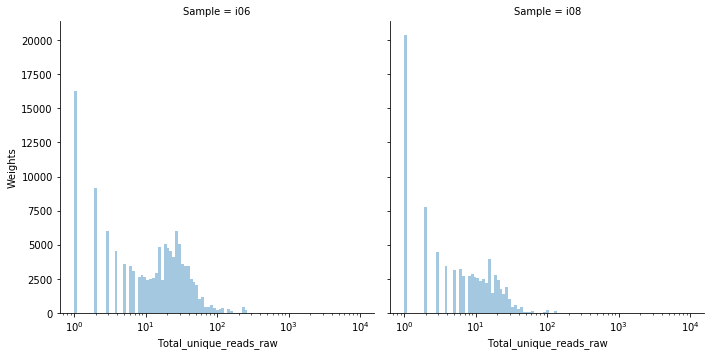

In [60]:
## FacetGrid lab (barplot)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data
filename1 = "i06.droplet_total_reads.tsv"
df1 = pd.read_csv(filename1, sep="\t", index_col=0)
df1 = df1.reset_index()
df1 = df1.groupby("Total_unique_reads_raw", as_index=False).count()
df1["Weights"] = df1["Barcode"] * df1["Total_unique_reads_raw"]
df1.loc[:, "Sample"] = "i06"

filename2 = "i08.droplet_total_reads.tsv"
df2 = pd.read_csv(filename2, sep="\t", index_col=0)
df2 = df2.reset_index()
df2 = df2.groupby("Total_unique_reads_raw", as_index=False).count()
df2["Weights"] = df2["Barcode"] * df2["Total_unique_reads_raw"]
df2.loc[:, "Sample"] = "i08"

# Merging datasets
df = pd.concat([df1, df2])
#display(df.shape)
#display(df.tail(2))

def weighted_hist(x, weights, **kwargs):
    sns.distplot(x, hist_kws={"weights": weights}, **kwargs)

g = sns.FacetGrid(df, col="Sample", col_wrap=2, height=5)
g.map(weighted_hist, "Total_unique_reads_raw", "Weights", bins=np.logspace(0, 4, 100), kde=False).set(xscale ="log")

Strain,H1,H3,Sample
RNA_f,,,
PB1,60,40,i04
PB2,30,70,i04


Strain,H1,H3,Sample
RNA_f,,,
PB1,80,20,i05
PB2,40,60,i05


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccf5200fd0>,
      dtype=object)

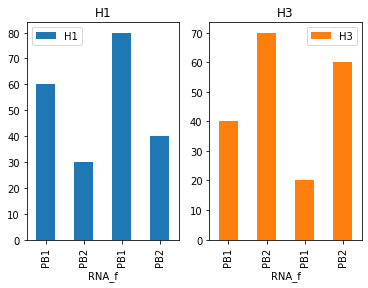

In [12]:
## FacetGrid lab (stacked barplot)
import pandas as pd
import numpy as np
import seaborn as sns

df1 = pd.DataFrame(np.array([["H1", "PB1", 60], ["H1", "PB2", 30], ["H3", "PB1", 40], ["H3", "PB2", 70]]), columns=["Strain", "RNA_f", "Perc"])
df1 = df1.pivot(index="RNA_f", columns="Strain", values="Perc")
df1.loc[:, "Sample"] = "i04"
display(df1)

df2 = pd.DataFrame(np.array([["H1", "PB1", 80], ["H1", "PB2", 40], ["H3", "PB1", 20], ["H3", "PB2", 60]]), columns=["Strain", "RNA_f", "Perc"])
df2 = df2.pivot(index="RNA_f", columns="Strain", values="Perc")
df2.loc[:, "Sample"] = "i05"
display(df2)

df = pd.concat([df1, df2])

df[["H1", "H3"]] = df[["H1", "H3"]].apply(pd.to_numeric)
df.plot.bar(stacked=True, subplots=True, layout=(1, 2))

Strain,H1,H3,Sample
RNA_f,,,
PB1,60,40,i04
PB2,30,70,i04


Strain,H1,H3,Sample
RNA_f,,,
PB1,80,20,i05
PB2,40,60,i05


Strain,H1,H3
RNA_f,,
PB1,60,40
PB2,30,70


Strain,H1,H3
i04,,
PB1,60,40
PB2,30,70


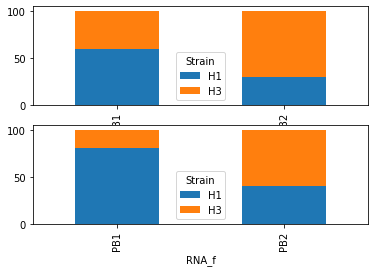

In [32]:
## FacetGrid lab (stacked barplot)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.DataFrame(np.array([["H1", "PB1", 60], ["H1", "PB2", 30], ["H3", "PB1", 40], ["H3", "PB2", 70]]), columns=["Strain", "RNA_f", "Perc"])
df1 = df1.pivot(index="RNA_f", columns="Strain", values="Perc")
df1.loc[:, "Sample"] = "i04"
display(df1)

df2 = pd.DataFrame(np.array([["H1", "PB1", 80], ["H1", "PB2", 40], ["H3", "PB1", 20], ["H3", "PB2", 60]]), columns=["Strain", "RNA_f", "Perc"])
df2 = df2.pivot(index="RNA_f", columns="Strain", values="Perc")
df2.loc[:, "Sample"] = "i05"
display(df2)

df = pd.concat([df1, df2])
df[["H1", "H3"]] = df[["H1", "H3"]].apply(pd.to_numeric)
display(df.loc[df.Sample == "i04", :].drop("Sample", axis=1))

fig, axes = plt.subplots(nrows=2, ncols=1)

#df.loc[df.Sample == "i04", ["RNA_f", "H1", "H3"]].plot(ax=axes[0,0], stacked=True)
#df.loc[df.Sample == "i05", ["RNA_f", "H1", "H3"]].plot(ax=axes[0,1], stacked=True)
df1 = df.loc[df.Sample == "i04", :].drop("Sample", axis=1).copy()
df1.index.names = ["i04"]
display(df1)
df1.plot.bar(ax=axes[0], stacked=True)
df2 = df.loc[df.Sample == "i05", :].drop("Sample", axis=1).copy()
df1.index.names = ["i085"]
df2.plot.bar(ax=axes[1], stacked=True)
#df.plot.bar(stacked=True, subplots=True, layout=(1, 2))

In [13]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.randint(0, 100, size=(4,4)), columns=["S1-F1", "S1-F2", "S2-F1", "S2-F2"])
display(df)

,S1-F1,S1-F2,S2-F1,S2-F2
0,28,44,77,20
1,30,41,12,38
2,3,59,77,75
3,73,47,76,84


In [58]:
## Getting BC with the more numerous different RNA fragments and the more reads (to create the toy dataset)
import pandas as pd

# Loading dataset
sample = "i04"
df = pd.read_csv(sample + ".droplet_stats.tsv", sep="\t", index_col=0, usecols=[0, 2, 3, 4])
df.dropna(inplace=True)
df.reset_index(inplace=True)
#display(df.head(2))

# Find the barcodes with the more numerous distinct RNA fragments
df2 = df.groupby(["Barcode", "Strain"])["RNA_fragment"].nunique()
#display(df2.sort_values(ascending=False))
# Find the barcodes with the more reads
df3 = df.groupby(["Barcode", "Strain"])["RNA_fragment"].count()
#display(df3.sort_values(ascending=False))
# Merging both information
df4 = pd.concat([df2, df3], axis=1)
df4.columns = ["Distinct_frags", "Total_reads"]
# Displaying sorted results for each of the strains
display(df4.loc[(df4.index.get_level_values("Strain") == "H1N1"), :].sort_values(by=["Distinct_frags", "Total_reads"], ascending=False).head(2))
display(df4.loc[(df4.index.get_level_values("Strain") == "H3N2"), :].sort_values(by=["Distinct_frags", "Total_reads"], ascending=False).head(2))

,,Distinct_frags,Total_reads
Barcode,Strain,,
B22-C90-D59-E1,H1N1,8,19
B78-C78-D41-E1,H1N1,7,15


,,Distinct_frags,Total_reads
Barcode,Strain,,
B41-C22-D28-E2,H3N2,8,121
B7-C49-D7-E2,H3N2,8,99


In [78]:
## Getting the reads that have a particular barcode (to create the toy dataset)
#barcodes = ["B41-C22-D28-E2", "B22-C90-D59-E1"] #i04
#barcodes = ["B64-C2-D93-E2", "B79-C46-D27-E1"] #i05
#barcodes = ["B35-C17-D59-E2", "B7-C10-D85-E1"] #i06
barcodes = ["B15-C26-D2-E2", "B64-C15-D20-E1"] #i08

sample = "i08"
df = pd.read_csv(sample + ".tsv", sep="\t", usecols=[0, 8])
df.columns = ["Read_IDs", "Barcode"]
display(df.head(2))
df.loc[df.Barcode.isin(barcodes), "Read_IDs"].to_csv(sample + ".toy_read_IDs.tsv", sep="\t", index=False, header=False)

/users/biocomp/bahin/anaconda3/envs/Env_conda_qPCR/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Read_IDs,Barcode
0,M05218:191:000000000-D7R5H:1:1102:12919:12938,B1-C1-D25-E2
1,M05218:191:000000000-D7R5H:1:1102:13620:28263,B1-C1-D41-E1


In [74]:
## Normalizing the clustermap (rows and columns)
import pandas as pd
import seaborn as sns

# Loading dataset
sample = "i04"
df = pd.read_csv(sample + ".clustermap.tsv", sep="\t", index_col=0, header=None)
display(df.head())
print(df.index)
display(df.loc["Strain"].head())
display(df.loc["RNA_fragment"].head())
#df.loc["Amplicon", :] = df.apply(lambda row: row.Strain + "_" + row.RNA_fragment)
display(df.tail())
#sns.clustermap(df, col_cluster=False, cmap="magma_r")

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
Strain,H1N1,H1N1,H1N1,H1N1,H1N1,H1N1,H1N1,H1N1,H3N2,H3N2,H3N2,H3N2,H3N2,H3N2,H3N2,H3N2
RNA_fragment,HA,M,NAseg,NP,NS,PA,PB1,PB2,HA,M,NAseg,NP,NS,PA,PB1,PB2
Barcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B1-C12-D12-E1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
B1-C14-D52-E2,0,0,0,0,0,0,0,0,1,0,1,0,4,0,0,0


Index(['Strain', 'RNA_fragment', 'Barcode', 'B1-C12-D12-E1', 'B1-C14-D52-E2',
       'B1-C15-D13-E2', 'B1-C15-D60-E2', 'B1-C17-D15-E2', 'B1-C17-D29-E2',
       'B1-C17-D80-E2',
       ...
       'B96-C84-D42-E2', 'B96-C86-D15-E2', 'B96-C87-D90-E2', 'B96-C88-D44-E2',
       'B96-C88-D62-E2', 'B96-C91-D48-E2', 'B96-C92-D23-E2', 'B96-C95-D55-E2',
       'B96-C95-D92-E2', 'B96-C96-D42-E2'],
      dtype='object', name=0, length=7194)


1    H1N1
2    H1N1
3    H1N1
4    H1N1
5    H1N1
Name: Strain, dtype: object

1       HA
2        M
3    NAseg
4       NP
5       NS
Name: RNA_fragment, dtype: object

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
B96-C91-D48-E2,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0
B96-C92-D23-E2,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0
B96-C95-D55-E2,0,0,0,0,0,0,0,0,1,1,0,8,2,0,0,0
B96-C95-D92-E2,0,0,0,0,0,0,0,0,9,2,1,23,5,5,2,0
B96-C96-D42-E2,0,0,0,0,0,0,0,0,2,1,0,0,1,1,0,0


<h1>UMAP</h1>

/users/biocomp/bahin/anaconda3/envs/Env_conda_qPCR/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../users/biocomp/bahin/anaconda3/envs/Env_conda_qPCR/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


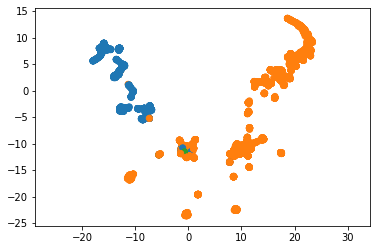

In [12]:
## Plotting a UMAP from the clustermap data
import pandas as pd
import umap
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

sample = "i08"

# Loading the clustermap data
dir = "/users/biocomp/bahin/Mounted_dir/biocompan/Bioinformatics_services/202003_Pasteur_Isel_DemultiplexInfluenza_A2020/Runs/MiSeq/"
#dir2 = "Regular_REF/" + sample + "/"
dir2 = "StringentMapping/" + sample + "/"
df = pd.read_csv(dir + dir2 + sample + ".clustermap.tsv", sep="\t", index_col=0, header=0)
df = df.iloc[2:]
df.sort_index(inplace=True)
#display(df.head())

# Processing the strain info to color the UMAP
strains = pd.read_csv(sample + ".droplet_stats.tsv", sep="\t", index_col=0, header=0, usecols=[0, 2])
strains = strains.loc[~strains.index.duplicated(keep="first")]  # Approximation: keeping only the strain found for a BC
strains_filtered = strains.loc[strains.index.isin(df.index)]
strains_filtered = strains_filtered.replace(["H1N1", "H3N2", "Undefined"], [0, 1, 2])
strains_filtered.sort_index(inplace=True)
strains_filtered["Strain"] = strains_filtered["Strain"].astype("int64")

# Creating the UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(df)
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in strains_filtered["Strain"]])
plt.gca().set_aspect('equal', 'datalim')

In [22]:
## Check R and R2 info concordancy
import pandas as pd
import seaborn as sns

# Loading dataset
sample = "i08"
df = pd.read_csv(sample + ".tsv", sep="\t", index_col=0)
display(df.head(2))

df["Strain_Conc"] = df["Strain_R1"] == df["Strain_R2"]
df["Segment_Conc"] = df["RNA_fragment_R1"] == df["RNA_fragment_R2"]
display(df.head(2))

display(df.groupby("Strain_Conc")["Strain_Conc"].count())
display(df.groupby("Segment_Conc")["Segment_Conc"].count())

/users/biocomp/bahin/anaconda3/envs/Env_conda_qPCR/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UMI,Strain_R1,RNA_fragment_R1,Strain_R2,RNA_fragment_R2,Strain,RNA_fragment,Barcode
M05218:191:000000000-D7R5H:1:1102:12919:12938,CGAAGGGGC,H3N2,NS,H3N2,NS,H3N2,NS,B1-C1-D25-E2
M05218:191:000000000-D7R5H:1:1102:13620:28263,TAGAGATCG,H1N1,NS,H3N2,NP,Undefined,Undefined,B1-C1-D41-E1


,UMI,Strain_R1,RNA_fragment_R1,Strain_R2,RNA_fragment_R2,Strain,RNA_fragment,Barcode,Strain_Conc,Segment_Conc
M05218:191:000000000-D7R5H:1:1102:12919:12938,CGAAGGGGC,H3N2,NS,H3N2,NS,H3N2,NS,B1-C1-D25-E2,True,True
M05218:191:000000000-D7R5H:1:1102:13620:28263,TAGAGATCG,H1N1,NS,H3N2,NP,Undefined,Undefined,B1-C1-D41-E1,False,False


Strain_Conc
False     18732
True     144054
Name: Strain_Conc, dtype: int64

Segment_Conc
False     34986
True     127800
Name: Segment_Conc, dtype: int64

In [16]:
## Check R and R2 info concordancy
import pandas as pd
import seaborn as sns

# Loading dataset
sample = "i08"
df2 = pd.read_csv(sample + ".tsv", sep="\t", index_col=0)
print(df2.shape)
df2 = df2.loc[~((df2.Strain_R1 == "Undefined") | (df2.RNA_fragment_R1 == "Undefined") | (df2.Strain_R2 == "Undefined") | (df2.RNA_fragment_R2 == "Undefined")), :]
print(df2.shape)
display(df2.head(2))

df["Strain_Conc"] = df["Strain_R1"] == df["Strain_R2"]
df["Segment_Conc"] = df["RNA_fragment_R1"] == df["RNA_fragment_R2"]
display(df.head(2))

display(df.groupby("Strain_Conc")["Strain_Conc"].count())
display(df.groupby("Segment_Conc")["Segment_Conc"].count())

(162786, 8)
(162783, 8)


/users/biocomp/bahin/anaconda3/envs/Env_conda_qPCR/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UMI,Strain_R1,RNA_fragment_R1,Strain_R2,RNA_fragment_R2,Strain,RNA_fragment,Barcode
M05218:191:000000000-D7R5H:1:1102:12919:12938,CGAAGGGGC,H3N2,NS,H3N2,NS,H3N2,NS,B1-C1-D25-E2
M05218:191:000000000-D7R5H:1:1102:13620:28263,TAGAGATCG,H1N1,NS,H3N2,NP,Undefined,Undefined,B1-C1-D41-E1


,UMI,Strain_R1,RNA_fragment_R1,Strain_R2,RNA_fragment_R2,Strain,RNA_fragment,Barcode,Strain_Conc,Segment_Conc
M05218:191:000000000-D7R5H:1:1102:12919:12938,CGAAGGGGC,H3N2,NS,H3N2,NS,H3N2,NS,B1-C1-D25-E2,True,True
M05218:191:000000000-D7R5H:1:1102:13620:28263,TAGAGATCG,H1N1,NS,H3N2,NP,Undefined,Undefined,B1-C1-D41-E1,False,False


Strain_Conc
False     18732
True     144054
Name: Strain_Conc, dtype: int64

Segment_Conc
False     34986
True     127800
Name: Segment_Conc, dtype: int64

In [18]:
## Check R and R2 info concordancy
import pandas as pd
import seaborn as sns

# Loading dataset
sample = "i08"
df2 = pd.read_csv(sample + ".tsv", sep="\t", index_col=0)
df2 = df2.loc[(df2.Strain == "Undefined") | (df2.RNA_fragment == "Undefined"), :]
display(df2.head(2))
display(df2.shape)

df["Strain_Conc"] = df["Strain_R1"] == df["Strain_R2"]
df["Segment_Conc"] = df["RNA_fragment_R1"] == df["RNA_fragment_R2"]
display(df.head(2))

display(df.groupby("Strain_Conc")["Strain_Conc"].count())
display(df.groupby("Segment_Conc")["Segment_Conc"].count())

/users/biocomp/bahin/anaconda3/envs/Env_conda_qPCR/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UMI,Strain_R1,RNA_fragment_R1,Strain_R2,RNA_fragment_R2,Strain,RNA_fragment,Barcode
M05218:191:000000000-D7R5H:1:1102:13620:28263,TAGAGATCG,H1N1,NS,H3N2,NP,Undefined,Undefined,B1-C1-D41-E1
M05218:191:000000000-D7R5H:1:1102:9801:27311,TAGAGATCG,H1N1,PB1,H1N1,PA,H1N1,Undefined,B1-C1-D64-E1


(35631, 8)

,UMI,Strain_R1,RNA_fragment_R1,Strain_R2,RNA_fragment_R2,Strain,RNA_fragment,Barcode,Strain_Conc,Segment_Conc
M05218:191:000000000-D7R5H:1:1102:12919:12938,CGAAGGGGC,H3N2,NS,H3N2,NS,H3N2,NS,B1-C1-D25-E2,True,True
M05218:191:000000000-D7R5H:1:1102:13620:28263,TAGAGATCG,H1N1,NS,H3N2,NP,Undefined,Undefined,B1-C1-D41-E1,False,False


Strain_Conc
False     18732
True     144054
Name: Strain_Conc, dtype: int64

Segment_Conc
False     34986
True     127800
Name: Segment_Conc, dtype: int64

(206052, 8)

NP                  101417
NS                   28338
PA                   24144
HA                   17892
M                    15564
NAseg                 8661
PB1                   5282
Unmapped              4530
PB2                    218
MappingAmbiguous         4
Undefined                2
Name: RNA_fragment_R1, dtype: int64

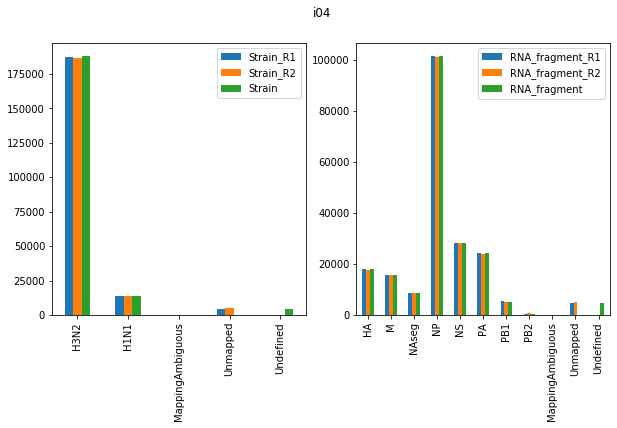

In [90]:
## Check strain/segment discordancy and unmapped/undefined status
import pandas as pd
import seaborn as sns

# Loading dataset
sample = "i04"
df = pd.read_csv(sample + ".MS.tsv", sep="\t", index_col=0)
#display(df.head(2))
display(df.shape)

strain_order = ["H3N2", "H1N1", "MappingAmbiguous", "Unmapped", "Undefined"]
segment_order = ["HA", "M", "NAseg", "NP", "NS", "PA", "PB1", "PB2", "MappingAmbiguous", "Unmapped", "Undefined"]

df2 = pd.concat([df["Strain_R1"].value_counts(), df["Strain_R2"].value_counts(), df["Strain"].value_counts()], axis=1)
df3 = pd.concat([df["RNA_fragment_R1"].value_counts(), df["RNA_fragment_R2"].value_counts(), df["RNA_fragment"].value_counts()], axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle(sample)
df2.loc[strain_order].plot.bar(ax=axes[0])
df3.loc[segment_order].plot.bar(ax=axes[1])

(206052, 8)

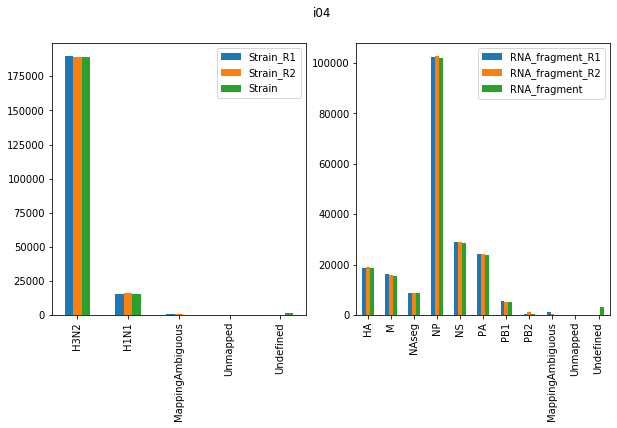

In [92]:
## Check strain/segment discordancy and unmapped/undefined status
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
sample = "i04"
df = pd.read_csv(sample + ".REF.tsv", sep="\t", index_col=0)
#display(df.head(2))
display(df.shape)

df2 = pd.concat([df["Strain_R1"].value_counts(), df["Strain_R2"].value_counts(), df["Strain"].value_counts()], axis=1)
df3 = pd.concat([df["RNA_fragment_R1"].value_counts(), df["RNA_fragment_R2"].value_counts(), df["RNA_fragment"].value_counts()], axis=1)

strain_order = ["H3N2", "H1N1", "MappingAmbiguous", "Unmapped", "Undefined"]
segment_order = ["HA", "M", "NAseg", "NP", "NS", "PA", "PB1", "PB2", "MappingAmbiguous", "Unmapped", "Undefined"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle(sample)
df2.loc[strain_order].plot.bar(ax=axes[0])
df3.loc[segment_order].plot.bar(ax=axes[1])

(162786, 8)

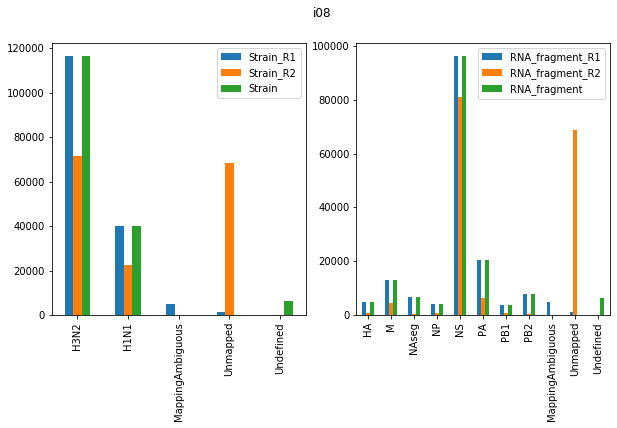

In [96]:
## Check strain/segment discordancy and unmapped/undefined status
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
sample = "i08"
df = pd.read_csv(sample + ".R2_100bp.tsv", sep="\t", index_col=0)
#display(df.head(2))
display(df.shape)

df2 = pd.concat([df["Strain_R1"].value_counts(), df["Strain_R2"].value_counts(), df["Strain"].value_counts()], axis=1)
df3 = pd.concat([df["RNA_fragment_R1"].value_counts(), df["RNA_fragment_R2"].value_counts(), df["RNA_fragment"].value_counts()], axis=1)

strain_order = ["H3N2", "H1N1", "MappingAmbiguous", "Unmapped", "Undefined"]
segment_order = ["HA", "M", "NAseg", "NP", "NS", "PA", "PB1", "PB2", "MappingAmbiguous", "Unmapped", "Undefined"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle(sample)
df2.loc[strain_order].plot.bar(ax=axes[0])
df3.loc[segment_order].plot.bar(ax=axes[1])

In [5]:
## Check UMI diversity
import pandas as pd
import seaborn as sns

# Loading dataset
sample = "i04"
df = pd.read_csv(sample + ".tsv", sep="\t", index_col=0)
display(df.head(2))

df = df.groupby("UMI")["UMI"].count()
df.index.name = "Mescouilles"
display(df.reset_index().sort_values(by="UMI", ascending=False).head())

/users/biocomp/bahin/anaconda3/envs/Env_conda_qPCR/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UMI,Strain_R1,RNA_fragment_R1,Strain_R2,RNA_fragment_R2,Strain,RNA_fragment,Barcode
M05218:192:000000000-D7R8M:1:1102:11449:15890,TACGGGTTG,H3N2,PA,Unmapped,Unmapped,H3N2,PA,B1-C11-D42-E2
M05218:192:000000000-D7R8M:1:1102:12087:10367,ACAATACCT,H3N2,HA,Unmapped,Unmapped,H3N2,HA,B1-C11-D90-E2


,Mescouilles,UMI
94507,TTTTTAGCA,218
42306,GAAAATTGC,141
38003,CTCCAATAC,106
82328,TGGACTCCA,73
56391,GGGGGGGGG,50


In [151]:
## Extracting KY seqs
# Loading data
sample = "i04"
df = pd.read_csv(sample + ".REF.tsv", sep="\t", index_col=0)
df.reset_index(inplace=True)
display(df.head(2))

# Parsing filtering info file
l = []
with open(sample + ".KY_list.tsv", "r") as input_file:
    input_file.readline()
    for line in input_file:
        l.append(line.strip().split("\t"))

# Getting the read IDs of interest
IDs = []
for i in l:
    if (i[1] == "") and (i[2] == ""):
        IDs += df.loc[(df.Barcode == i[0]) & (df.RNA_fragment == i[3]), "index"].tolist()
    elif (i[1] != "") and (i[2] == ""):
        IDs += df.loc[(df.Barcode == i[0]) & (df.UMI == i[1]) & (df.RNA_fragment == i[3]), "index"].tolist()
    elif (i[1] == "") and (i[2] != ""):
        IDs += df.loc[(df.Barcode == i[0]) & (df.Strain == i[2]) & (df.RNA_fragment == i[3]), "index"].tolist()
    else:  # We have the UMI and strain
        IDs += df.loc[(df.Barcode == i[0]) & (df.UMI == i[1]) & (df.Strain == i[2]) & (df.RNA_fragment == i[3]), "index"].tolist()

# Writing the IDs
pd.Series(IDs).to_csv(sample + ".read_IDs.txt", index=False, header=False)

/users/biocomp/bahin/anaconda3/envs/Env_conda_qPCR/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,UMI,Strain_R1,RNA_fragment_R1,Strain_R2,RNA_fragment_R2,Strain,RNA_fragment,Barcode
0,M05218:192:000000000-D7R8M:1:1102:11449:15890,TACGGGTTG,H3N2,PA,H3N2,PA,H3N2,PA,B1-C11-D42-E2
1,M05218:192:000000000-D7R8M:1:1102:12087:10367,ACAATACCT,H3N2,HA,H3N2,HA,H3N2,HA,B1-C11-D90-E2
